# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [0]:
### i love and would like to see more of Bokeh!

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper
from bokeh.palettes import d3
from bokeh.plotting import figure
from bokeh.transform import transform
output_notebook()

Loading BokehJS ...

In [3]:
!wget https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv

--2019-07-11 01:29:52--  https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4384 (4.3K) [text/plain]
Saving to: ‘drinks.csv’

drinks.csv          100%[===================>]   4.28K  --.-KB/s    in 0s      

2019-07-11 01:29:52 (84.3 MB/s) - ‘drinks.csv’ saved [4384/4384]



In [4]:
!ls

drinks.csv  sample_data


In [7]:
d1 = pd.read_csv('drinks.csv')
print(d1.shape)

(193, 5)


In [10]:
drink = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv')
print(drink.shape)
drink.head()

(193, 5)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [11]:
drink.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

In [12]:
drink.sort_values('spirit_servings').head(20)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
27,Burundi,88,0,0,6.3
128,Pakistan,0,0,0,0.0
118,Nauru,49,0,8,1.0
111,Monaco,0,0,0,0.0
46,North Korea,0,0,0,0.0
107,Mauritania,0,0,0,0.0
106,Marshall Islands,0,0,0,0.0
103,Maldives,0,0,0,0.0
55,Equatorial Guinea,92,0,233,5.8


<function matplotlib.pyplot.show>

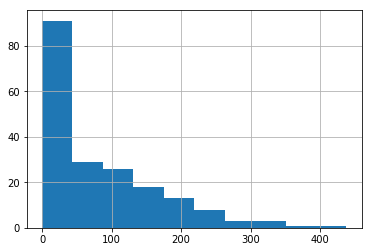

In [13]:
drink.spirit_servings.hist()
plt.show

In [16]:
drink['drinks_alcohol'] = np.where(drink['total_litres_of_pure_alcohol'] > 9, 'high',
                           np.where(drink['total_litres_of_pure_alcohol'] >= 6, 'medium',
                           np.where(drink['total_litres_of_pure_alcohol'] == 0, 'none', 'low')))
drink.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol
0,Afghanistan,0,0,0,0.0,none
1,Albania,89,132,54,4.9,low
2,Algeria,25,0,14,0.7,low
3,Andorra,245,138,312,12.4,high
4,Angola,217,57,45,5.9,low


In [17]:
drink.drinks_alcohol.value_counts()

low       105
medium     41
high       34
none       13
Name: drinks_alcohol, dtype: int64

In [18]:
countries = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')
print(countries.shape)
countries.head()

(249, 11)


,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [0]:
drink.at[184, 'country'] = 'United States of America'

In [20]:
countries[['name','region','sub-region']].head()

,name,region,sub-region
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia


In [22]:
df = pd.merge(drink, countries[['name','region','sub-region']], how='left', left_on='country', right_on='name')
print(df.shape)
df.head(20)

(193, 9)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol,name,region,sub-region
0,Afghanistan,0,0,0,0.0,none,Afghanistan,Asia,Southern Asia
1,Albania,89,132,54,4.9,low,Albania,Europe,Southern Europe
2,Algeria,25,0,14,0.7,low,Algeria,Africa,Northern Africa
3,Andorra,245,138,312,12.4,high,Andorra,Europe,Southern Europe
4,Angola,217,57,45,5.9,low,Angola,Africa,Sub-Saharan Africa
5,Antigua & Barbuda,102,128,45,4.9,low,NaN,NaN,NaN
6,Argentina,193,25,221,8.3,medium,Argentina,Americas,Latin America and the Caribbean
7,Armenia,21,179,11,3.8,low,Armenia,Asia,Western Asia
8,Australia,261,72,212,10.4,high,Australia,Oceania,Australia and New Zealand
9,Austria,279,75,191,9.7,high,Austria,Europe,Western Europe


In [23]:
df.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
drinks_alcohol                   0
name                            25
region                          25
sub-region                      25
dtype: int64

In [24]:
df[df.region.isna()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol,name,region,sub-region
5,Antigua & Barbuda,102,128,45,4.9,low,NaN,NaN,NaN
20,Bolivia,167,41,8,3.8,low,NaN,NaN,NaN
21,Bosnia-Herzegovina,76,173,8,4.6,low,NaN,NaN,NaN
24,Brunei,31,2,1,0.6,low,NaN,NaN,NaN
28,Cote d'Ivoire,37,1,7,4.0,low,NaN,NaN,NaN
45,Czech Republic,361,170,134,11.8,high,NaN,NaN,NaN
46,North Korea,0,0,0,0.0,none,NaN,NaN,NaN
47,DR Congo,32,3,1,2.3,low,NaN,NaN,NaN
79,Iran,0,0,0,0.0,none,NaN,NaN,NaN
92,Laos,62,0,123,6.2,medium,NaN,NaN,NaN


In [25]:
drink.iloc[184]

country                         United States of America
beer_servings                                        249
spirit_servings                                      158
wine_servings                                         84
total_litres_of_pure_alcohol                         8.7
drinks_alcohol                                    medium
Name: 184, dtype: object

In [32]:
df.region.value_counts()

Africa      48
Asia        40
Europe      37
Americas    28
Oceania     15
Name: region, dtype: int64

In [33]:
df = df.dropna(subset=["region"])
df.shape

(168, 9)

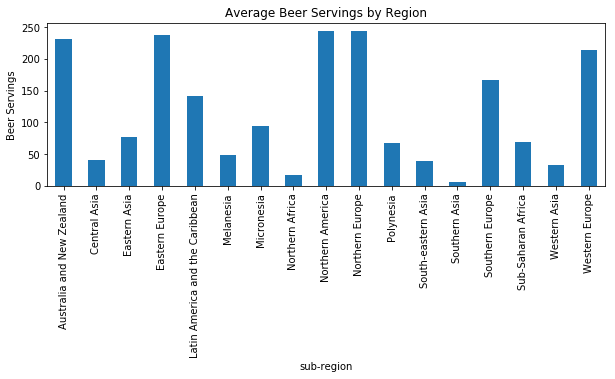

In [28]:
df.groupby('sub-region').beer_servings.mean().plot(kind='bar', figsize=(10,3))
plt.title('Average Beer Servings by Region')
plt.ylabel('Beer Servings')
plt.show()

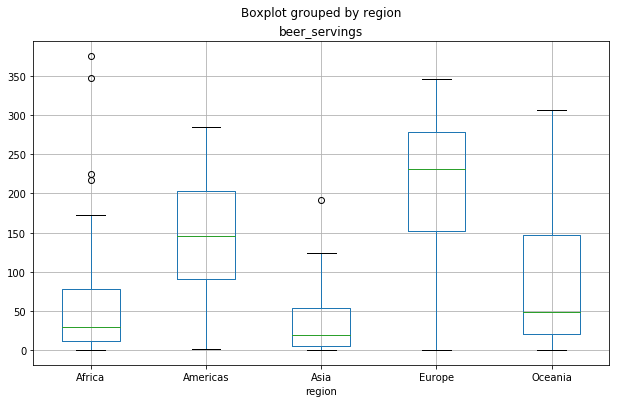

In [29]:
df.boxplot(column='beer_servings', by='region', figsize=(10,6))
plt.show()

In [36]:
output_notebook()
x = df.beer_servings.values
y = df.wine_servings.values
country = df.country
region = df.region

source = ColumnDataSource(data=dict(x=x, y=y, country=country, region=region))
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ("(x,y)", "(@x, @y)"),
    ('country', '@country'),
])

palette = d3['Category10'][len(df['region'].unique())]
mapper = CategoricalColorMapper(factors = df['region'].unique(), palette = palette)

# create figure and plot
p = figure(plot_width=600, plot_height=600, 
           tools=[hover, "wheel_zoom", "box_zoom", "reset"], 
           title="Beer and Wine Servings per Year by Country")

# create plot
p.scatter(x='x', y='y', size=10, alpha=0.8,
          color={'field': 'region', 'transform': mapper},
          legend='region', 
          source=source)

# add axis labels
p.xaxis.axis_label = "Beer Servings"
p.yaxis.axis_label = "Wine Servings"

output_file('interactive_bokeh_plot.html')
show(p)

Loading BokehJS ...

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

2.  What was the most challenging part of what you did?

3.  What was the most interesting thing you learned?

4.  What area would you like to explore with more time?




# Assignment Answers

## 1) I found a set of data that is relevant to the work i am proforming. after findthing the data needed I searched it for missing information or any information i would think would make it more relevant to the work. After adding additional information I removed errors then created an interactive graph for your viewing pleasure. 
## 2) I could not figure out how to create my own csv file for data that i found.
## 3) i love the way Bokeh looks and the information in the Bokeh Library.
## 4) i would like to explore how to compile my own data into a data set. Information that i found bout different studies that have not already been compiled. 

# Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.